In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
len_bit = 16
class Field:
    def __init__(self, digit):
        # 16 bits
        assert len(digit) == len_bit
        self.digit = digit 
    def __add__(self, o):
        re = []
        carry = 0
        for i in reversed(range(len_bit)):
            t = int(self.digit[i]) + int(o.digit[i]) + carry
            carry = int(t / 2)
            re.append(int(t % 2))
        re.reverse()
        rStr = ''
        for r in re: rStr += str(r)
        return Field(rStr)
    def inverse(self):
        rStr = ''
        for r in self.digit:
            rStr += '1' if r == '0' else '0'
        return Field(rStr)
    def get_int_list(self):
        return [int(e) for e in self.digit]

In [53]:
def getCheck(src, dst, length):
    return (src + dst + length).inverse()
def checkNum(src, dst, length, check):
    x_list = range(16)
    # plot four field values
    plt.plot(x_list, src.get_int_list(), color='r', linewidth=1, alpha=0.6)
    plt.plot(x_list, dst.get_int_list(), color='g', linewidth=1, alpha=0.6)
    plt.plot(x_list, length.get_int_list(), color='b', linewidth=1, alpha=0.6)
    plt.plot(x_list, check.get_int_list(), color='y', linewidth=1, alpha=0.6)
    plt.legend(['src','dst','length','check']) 
    # check whether the information loss
    re = (src + dst + length + check).digit
    print(re)
    if re == '1' * 16: return True
    else:return False

1111111111111111


True

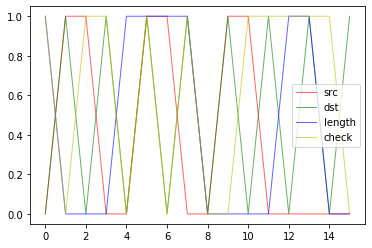

In [54]:
src = Field('0110011001100000')
dst = Field('0101010101010101')
length = Field('1000111100001100')
check = getCheck(src, dst, length)

checkNum(src, dst, length, check)